<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/06_UnsupervisedLearning/Assignment/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing Liberaries

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")

import missingno as msno # package to visualize the missing values 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Reading Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Greatelearning/vehicle.csv")
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
data.columns = data.columns.str.replace(".","_")
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

In [ ]:
data.shape

(846, 19)

#### Exploratory Data analysis

##### Checking Missing Values - Null Values


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr_axis_aspect_ratio         844 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr_axis_rectangularity       843 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance_1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Missing Values Count by Features 
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64


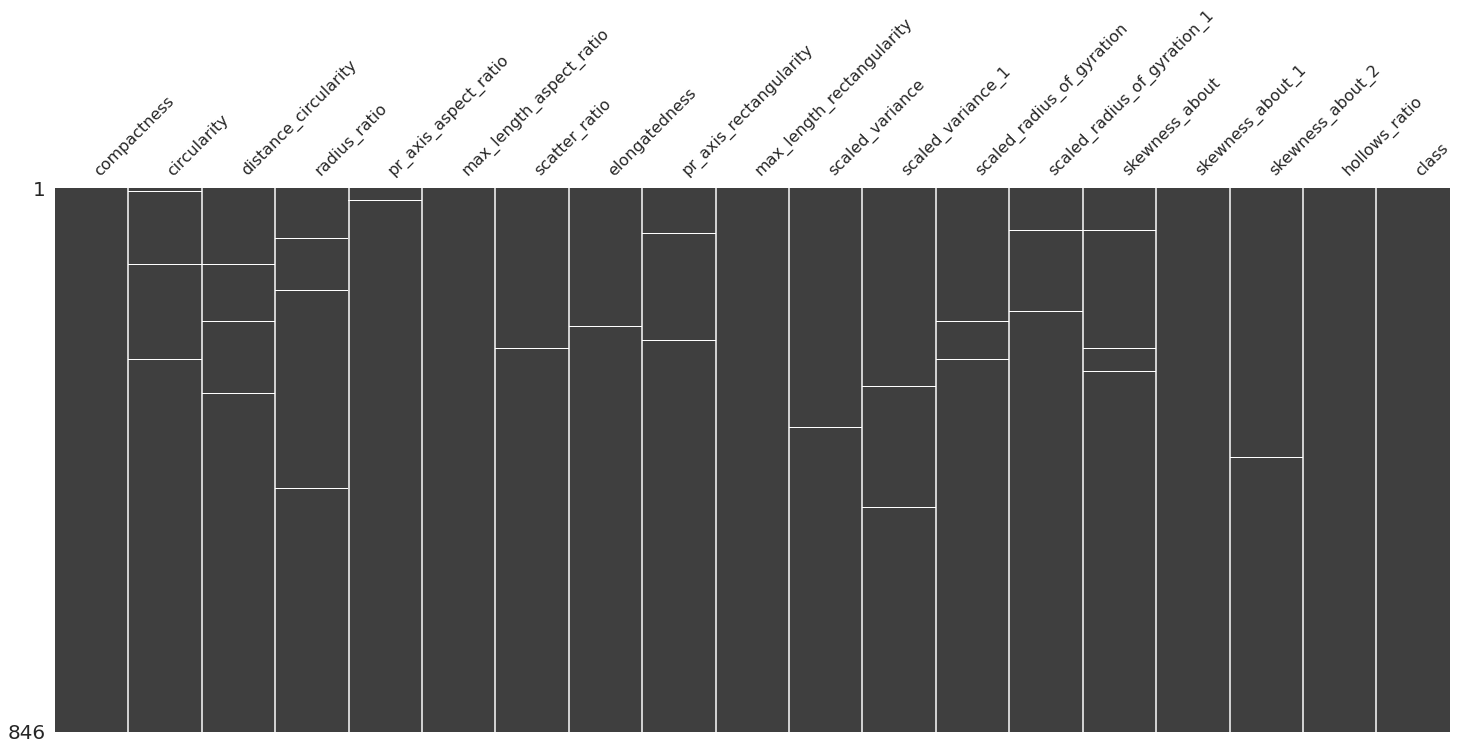

In [ ]:
#pip install missingno
print("Missing Values Count by Features","\n",data.isnull().sum())
msno.matrix(data,sparkline=False);

In [ ]:
print("Missing values in % - ",round(((data[data.isna().any(axis=1)].shape[0] / data.shape[0])*100),0))

Missing values in % -  4.0


**Observation** 


*   4 % of the observation has value missing
*   From the visualization -  no relationship between the data missing and any other values, observed or missing, within the dataset **(Missing data completely at random ( MACR )**) 
*   Two ways of handling it
    - remove all the observation with atlese one missing value
    - Imputation tech ( Median/Mean/Mode) can be used to fill the value


In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr_axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max_length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr_axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max_length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


##### Impute Missing values

In [ ]:
data_imp = data.copy()
print(data_imp.columns[data_imp.isnull().any()])

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr_axis_rectangularity', 'scaled_variance', 'scaled_variance_1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration_1',
       'skewness_about', 'skewness_about_1', 'skewness_about_2'],
      dtype='object')


In [ ]:
def median_impute(data_imp,column_name,missing_value):
  median_van = data_imp[column_name][data_imp["class"] == "van"].median()
  median_bus = data_imp[column_name][data_imp["class"] == "bus"].median()
  median_car = data_imp[column_name][data_imp["class"] == "car"].median()
  condition = [data_imp.loc[missing_value,"class"] == "bus",data_imp.loc[missing_value,"class"] == "van",data_imp.loc[missing_value,"class"] == "car"]
  condition_value = [median_bus,median_van,median_car]
  data_imp.loc[missing_value,column_name] = np.select(condition,condition_value)

def dist_compare(data,data_impu,column_name,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[0])
    #ax[0].title("orignal Data")
    sns.histplot(data=data_impu,x=column_name,hue=hue_column,kde=True,ax=ax[1])
    #ax[1].title("Imputed Data")
    #sm.qqplot(data[column_name],ax=ax[2],line='45',fit=True)
    ax[1].set_xlabel(column_name+"_Imputed")    
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 


###### circularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


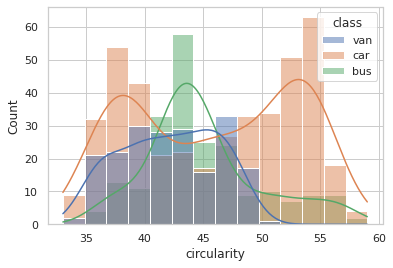

In [ ]:
column_name = "circularity"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

Observation :


*   5 Observation has NaN for "circularity" out of it 4 observation belong to Bus
*  From Histogram, 
    - Bimodel distribution for the "Car" Class, so mean/Median imputation will not work good. Observation (105) can be removed.
    - Almost normal distribution, Median imputation can be performed. 









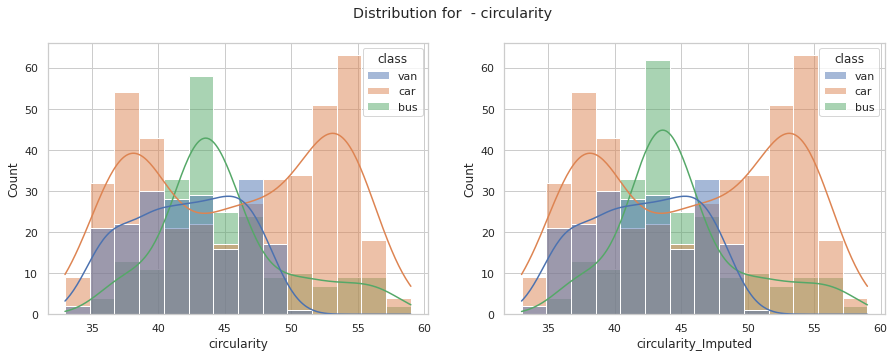

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,44.0,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


In [ ]:
data_imp.drop([105],inplace=True)           
data_imp[data_imp[column_name].isnull()]  

missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

In [ ]:
# data_imp["circularity"].fillna(data_imp["circularity"][data_imp["class"] == "bus"].median(),inplace=True)
# data.loc[[5,118,266,396]]

Observation - there is no impact on the distribution after impute





###### distance_circularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,NaN,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,NaN,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


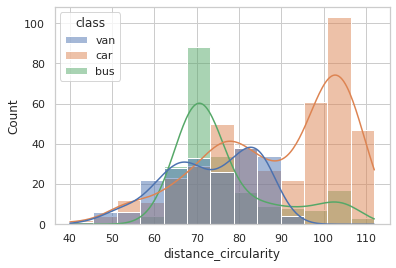

In [ ]:
column_name = "distance_circularity"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

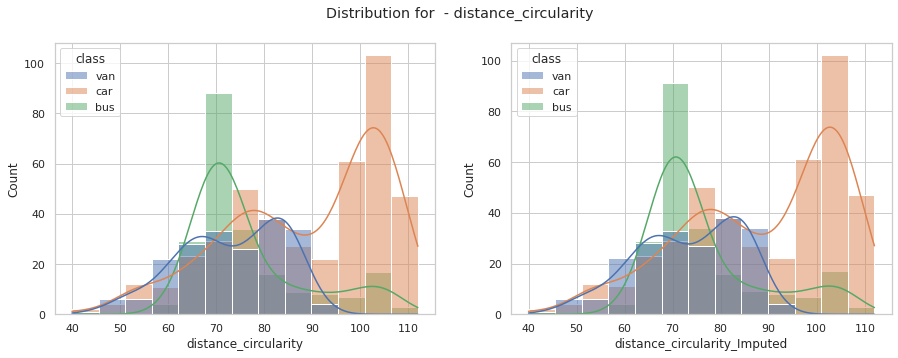

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
35,100,46.0,75.0,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,72.0,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,72.0,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


In [ ]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

Observation 
  - Missing values are replaced by the Median Value within the class
  - No impact in distribution after the impute. 

###### radius_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,NaN,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,NaN,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,NaN,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,NaN,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


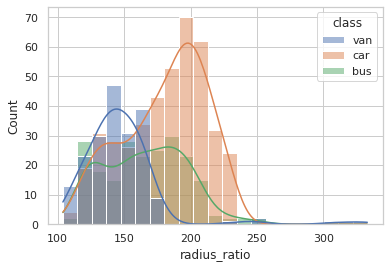

In [ ]:
column_name = "radius_ratio"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

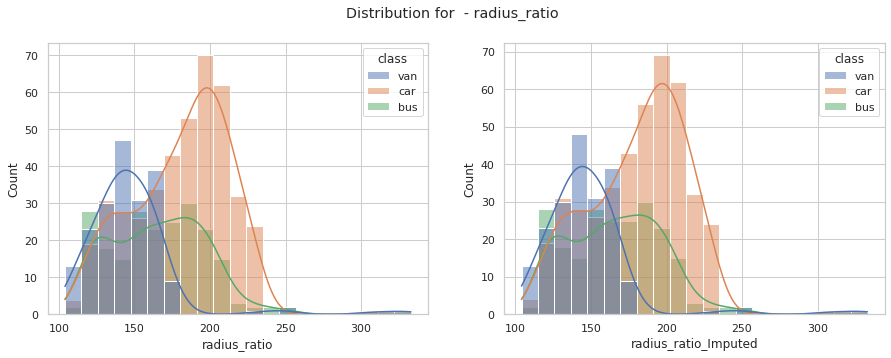

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
9,93,44.0,98.0,186.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,167.5,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,186.0,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,144.0,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,167.5,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,186.0,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


In [ ]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

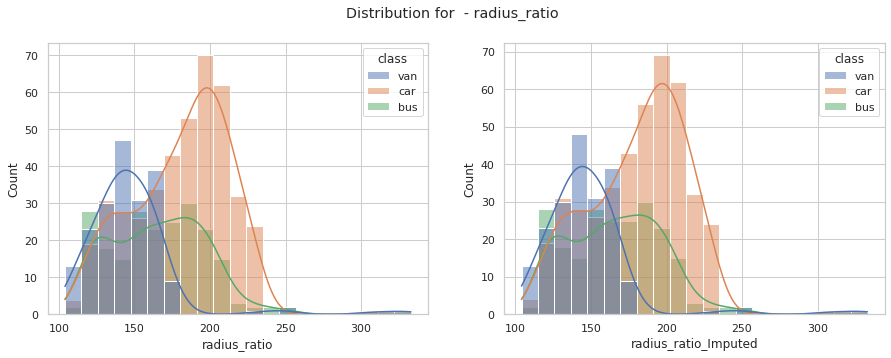

In [ ]:
dist_compare(data,data_imp,"radius_ratio","class")

Observation 
  - Missing values are replaced by the Median Value within the class
  - No impact in distribution after the impute. 

###### pr_axis_aspect_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


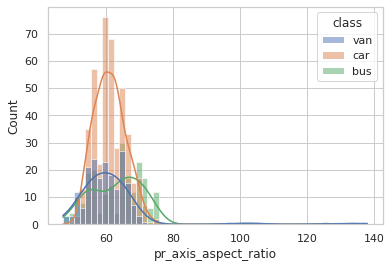

In [ ]:
column_name = "pr_axis_aspect_ratio"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

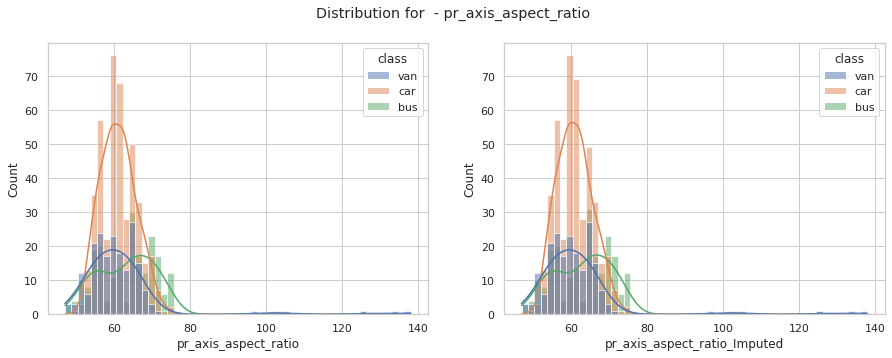

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
19,101,56.0,100.0,215.0,61.0,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


In [ ]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scatter_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car


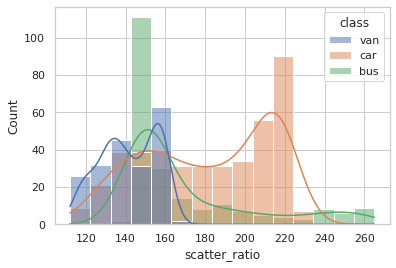

In [ ]:
column_name = "scatter_ratio"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

In [ ]:
# Observation follows BiModel - Observation is removed.
data_imp.drop([249],inplace=True)

###### elongatedness


,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,NaN,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


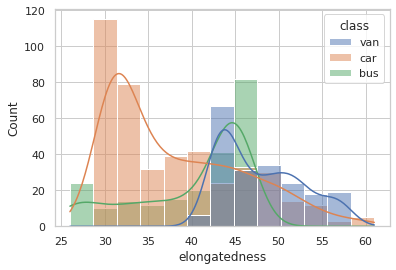

In [ ]:
column_name = "elongatedness"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

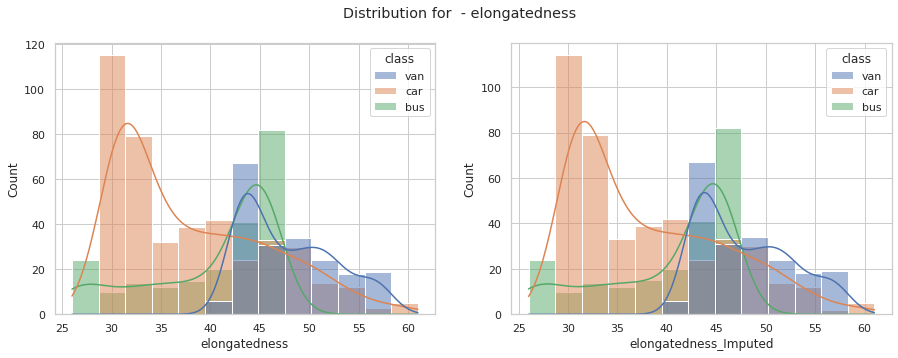

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,36.0,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


In [ ]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]


###### pr_axis_rectangularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,NaN,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus
273,96,45.0,80.0,162.0,63.0,9,146.0,46.0,NaN,148,161.0,316.0,161.0,64.0,5.0,10.0,199.0,207,van


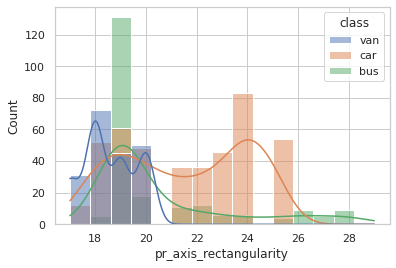

In [ ]:
column_name = "pr_axis_rectangularity"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

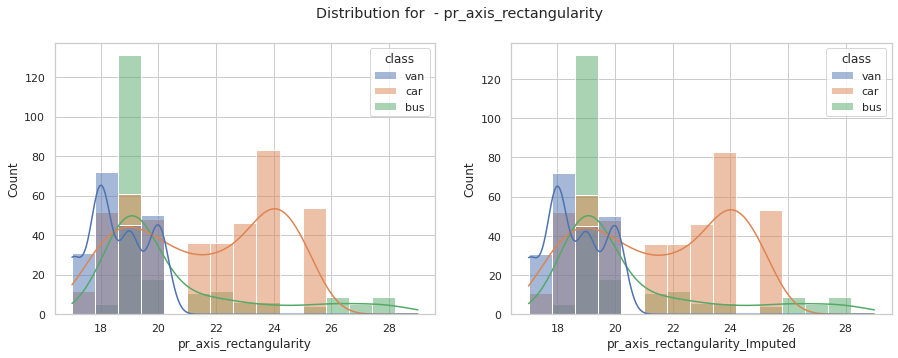

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,19.0,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus


In [ ]:
#Removed the Observation of "van" & "Car"
data_imp.drop([70,273],inplace=True)

# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]


###### scaled_variance

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,NaN,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,NaN,291.0,126.0,66.0,1.0,38.0,193.0,204,car


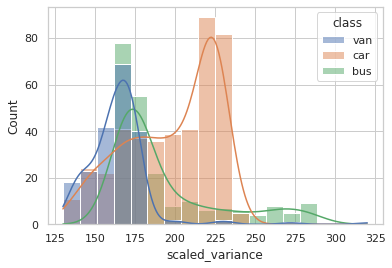

In [ ]:
column_name = "scaled_variance"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

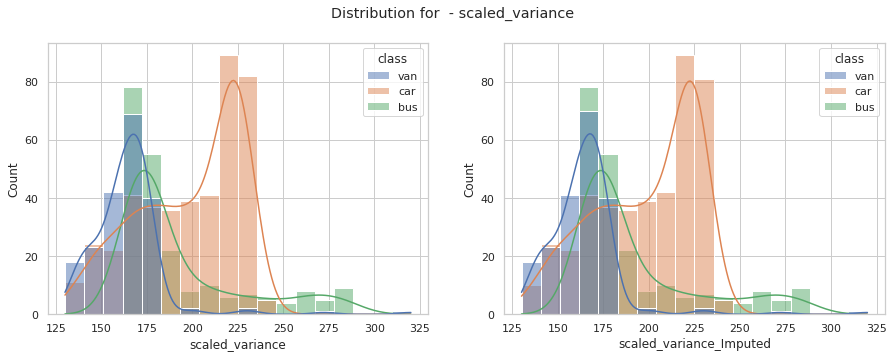

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,164.0,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,206.0,291.0,126.0,66.0,1.0,38.0,193.0,204,car


In [ ]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scaled_variance_1

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
308,109,51.0,100.0,197.0,59.0,10,192.0,34.0,22.0,161,210.0,NaN,195.0,64.0,14.0,3.0,196.0,202,car
496,106,55.0,98.0,224.0,68.0,11,215.0,31.0,24.0,170,222.0,NaN,214.0,68.0,2.0,29.0,189.0,201,car


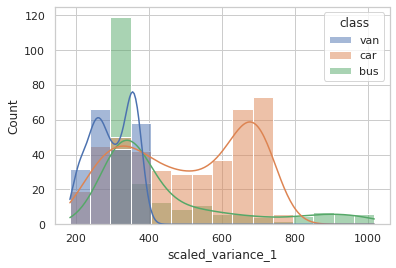

In [ ]:
column_name = "scaled_variance_1"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

In [ ]:
#Removed the Observation of Car - due to its bimodel nature"
data_imp.drop([308,496],inplace=True)

###### scaled_radius_of_gyration

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus


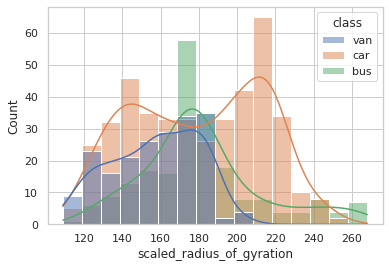

In [ ]:
column_name = "scaled_radius_of_gyration"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

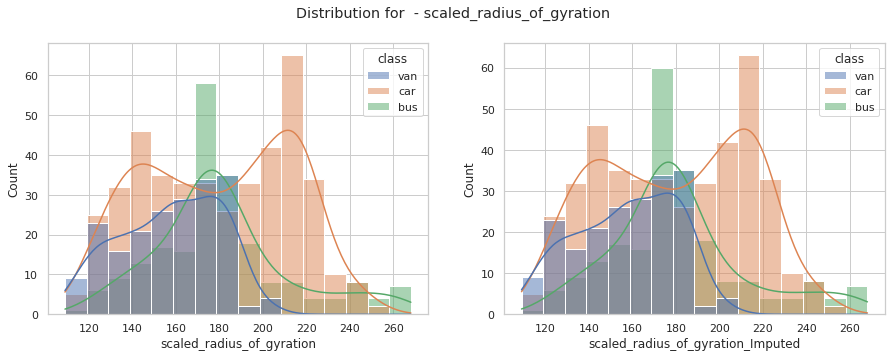

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,176.0,85.0,1.0,6.0,179.0,182,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,176.0,85.0,5.0,4.0,179.0,183,bus


In [ ]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scaled_radius_of_gyration_1

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,NaN,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,NaN,5.0,15.0,192.0,197,car


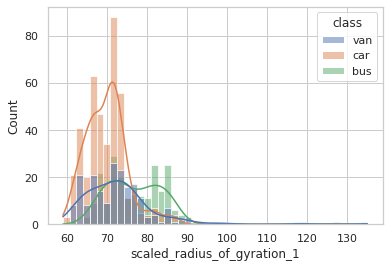

In [ ]:
column_name = "scaled_radius_of_gyration_1"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

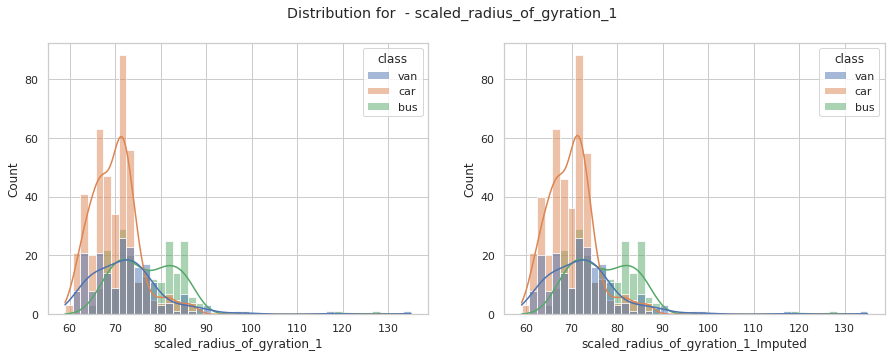

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,70.0,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,70.0,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,70.0,5.0,15.0,192.0,197,car


In [ ]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### skewness_about

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,NaN,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,NaN,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,NaN,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,NaN,5.0,195.0,201,car


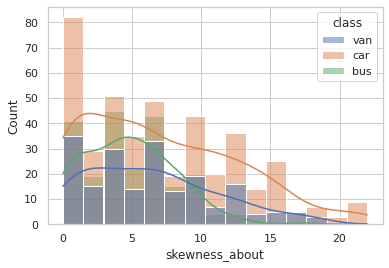

In [ ]:
column_name = "skewness_about"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

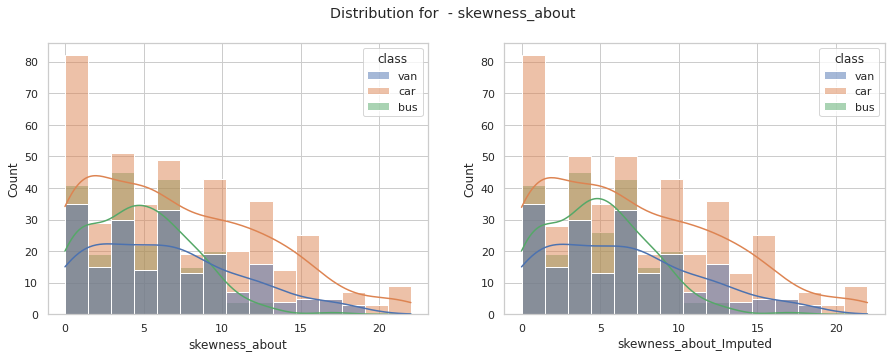

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,5.0,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,5.0,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,5.0,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,5.0,1.0,197.0,198,bus
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,6.0,5.0,195.0,201,car


In [ ]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

In [ ]:
# column_name = "skewness_about_1"
# sns.histplot(data=data,hue="class",x=column_name,kde=True)
# data_imp[data_imp[column_name].isnull()]

# column_name = "skewness_about_1"
# sns.histplot(data=data,hue="class",x=column_name,kde=True)
# data_imp[data_imp[column_name].isnull()]

###### % of Observation dropped

In [ ]:
print("% of Observation removed - ",round(((data.shape[0] - data_imp.shape[0]) / data.shape[0])*100,2))


% of Observation removed -  0.71


Observation - less than 1 % of data is removed and it's ok.

##### Treating Outlier

In [ ]:
def plot_distribution(data,column_name,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.distplot(data[column_name],ax=ax[0],bins=10)
    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[1])
    #sm.qqplot(data[column_name],ax=ax[2],line='45',fit=True)
    #ax[2].set_xlabel(column_name)
    sns.boxplot(data=data,y=column_name,orient='v',ax=ax[2])
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 

###### Distribution and BOX plot to find outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


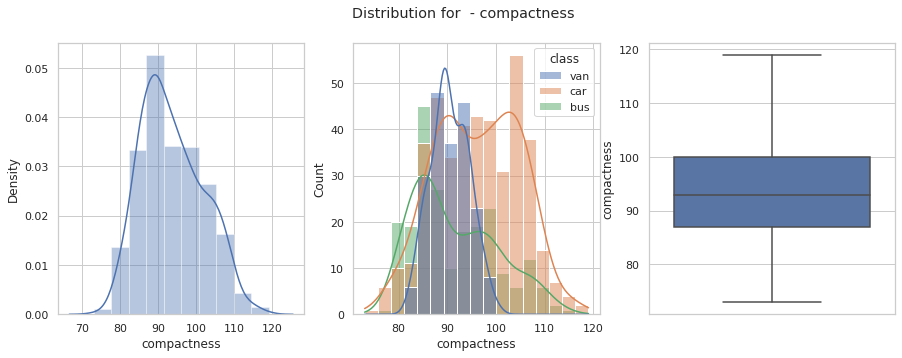

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


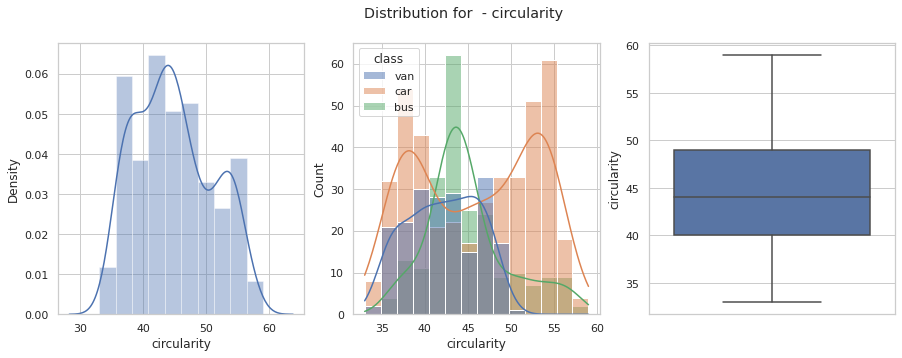

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


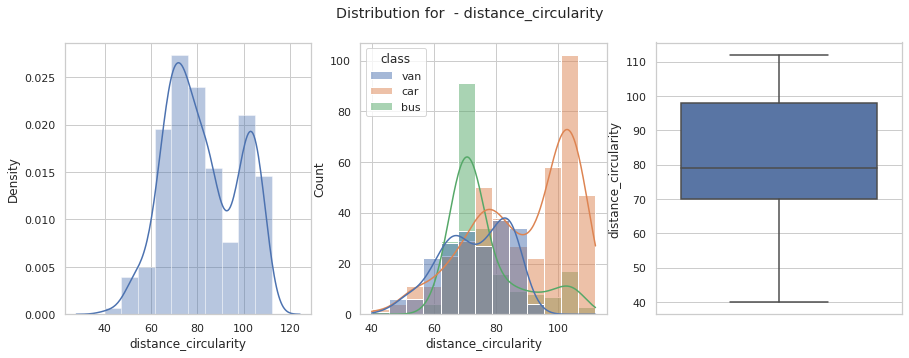

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


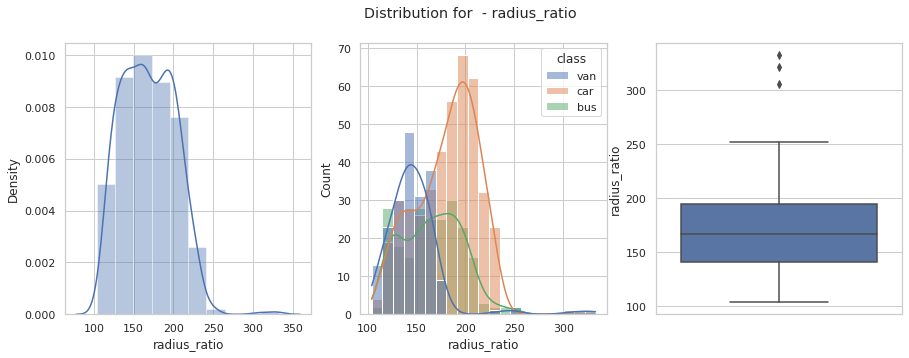

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


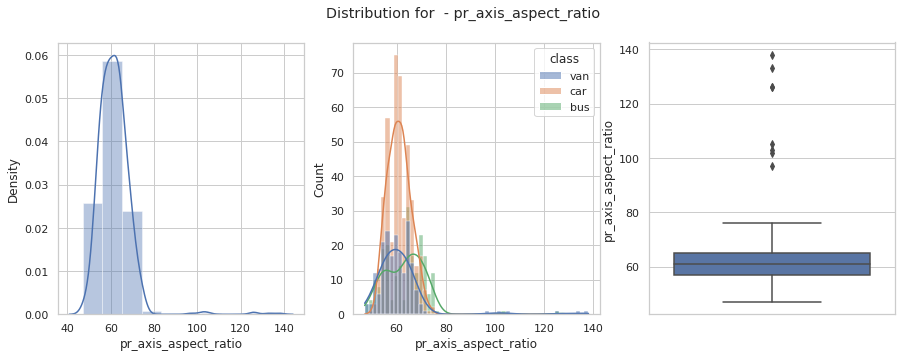

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


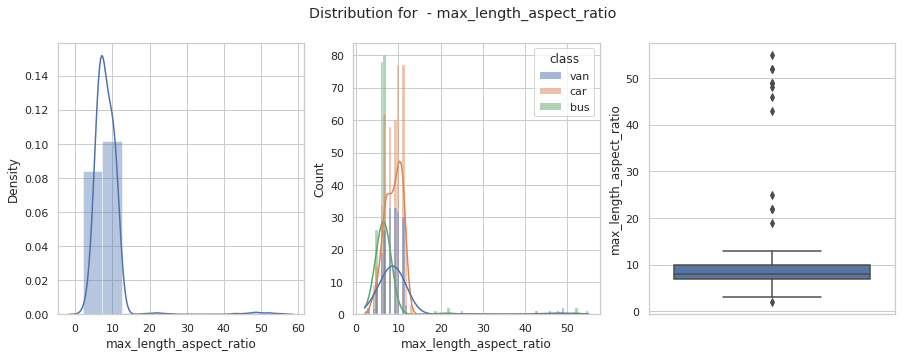

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


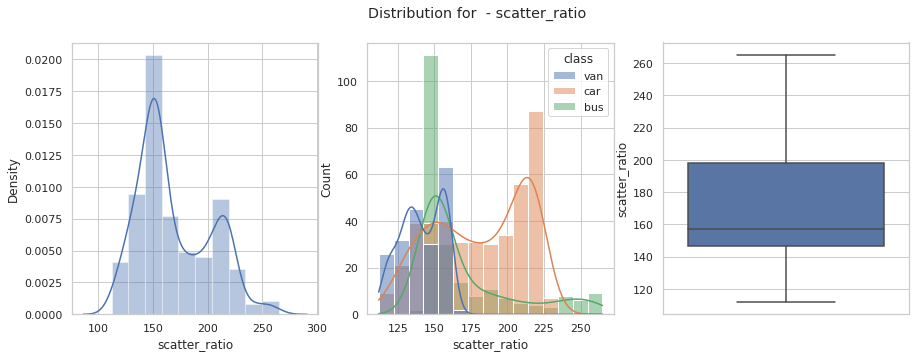

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


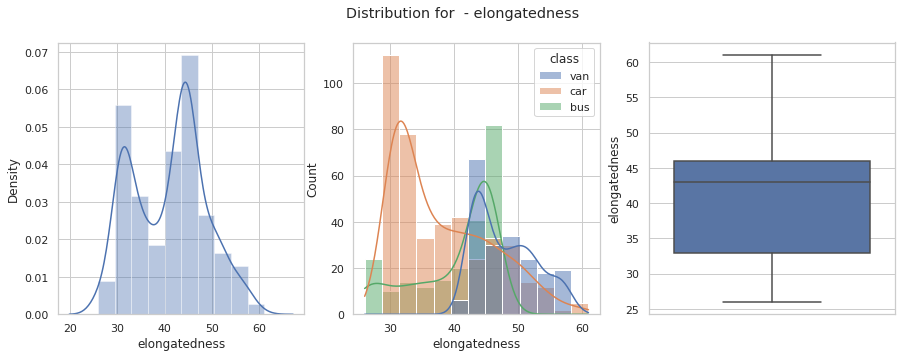

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


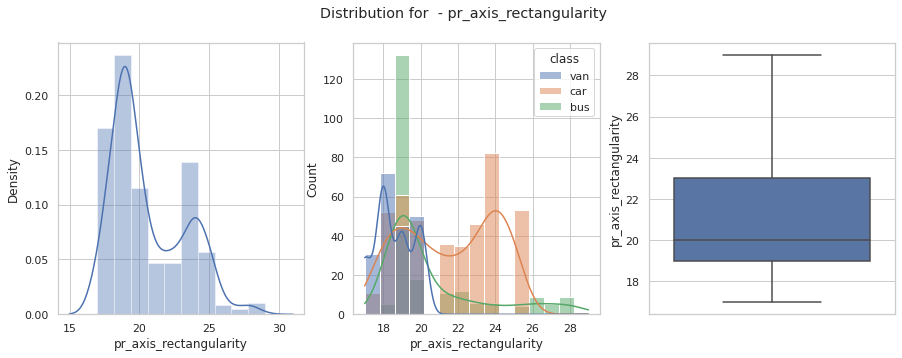

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


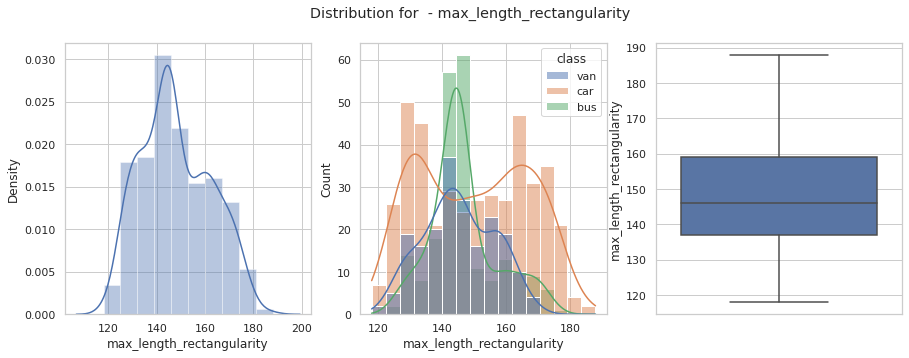

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


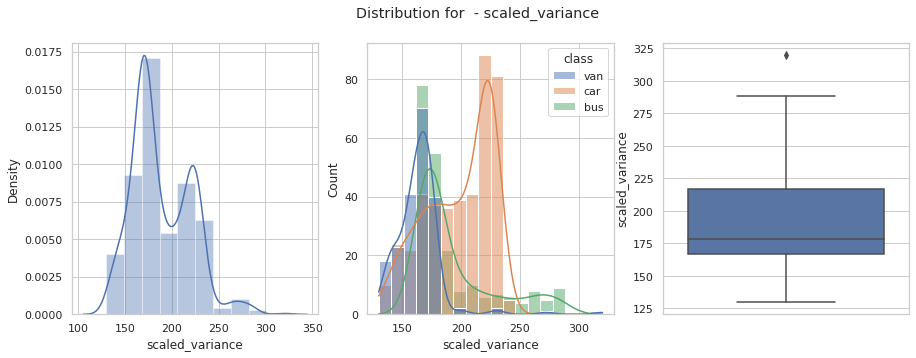

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


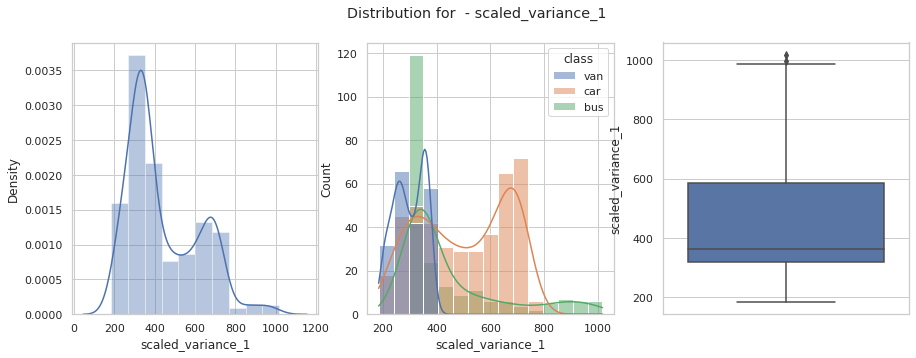

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


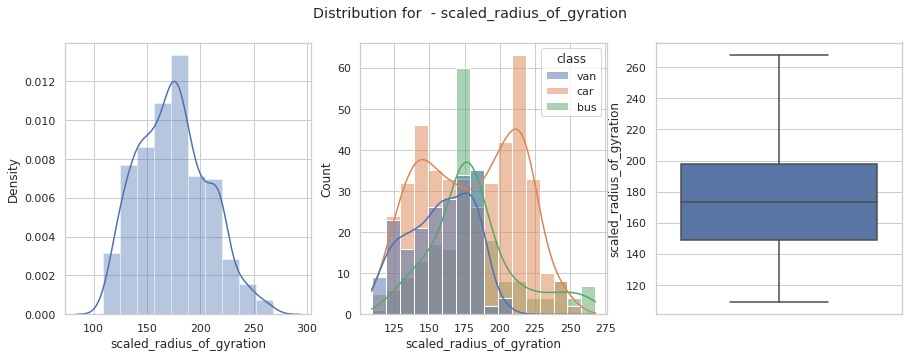

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


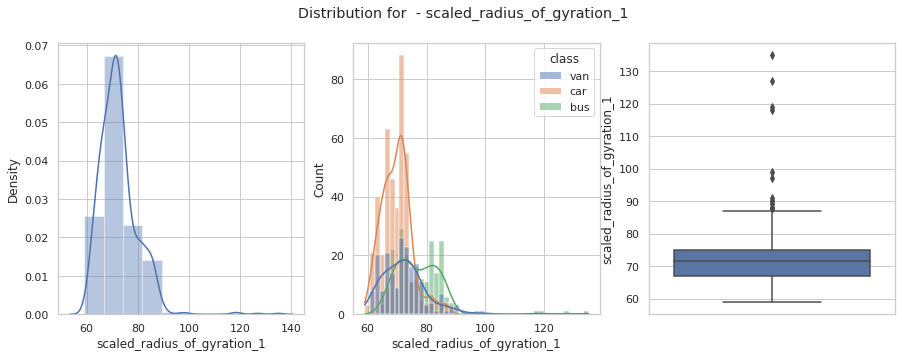

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


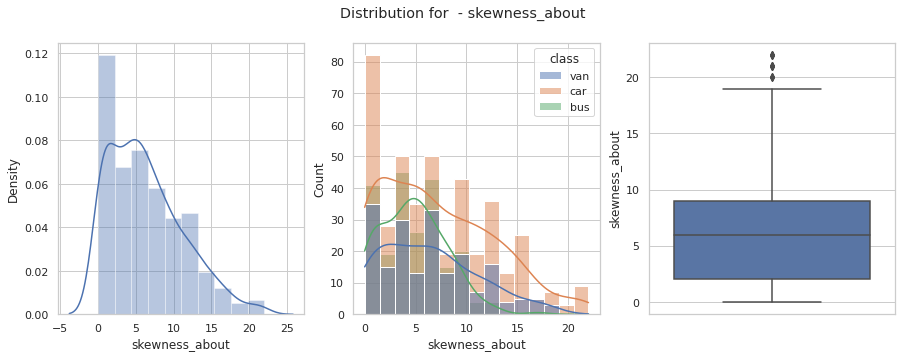

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


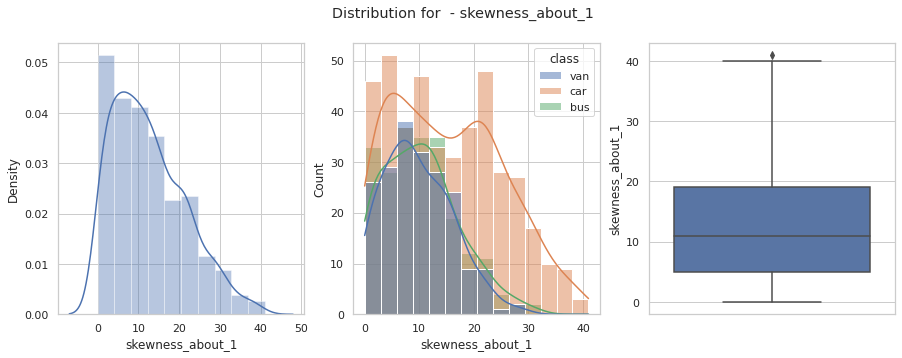

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


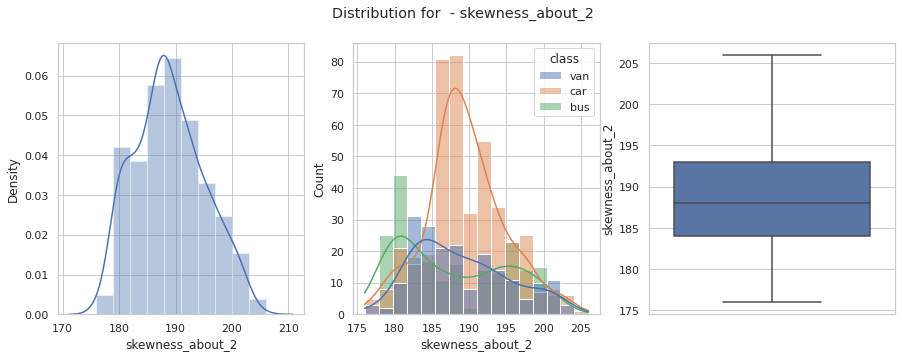

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


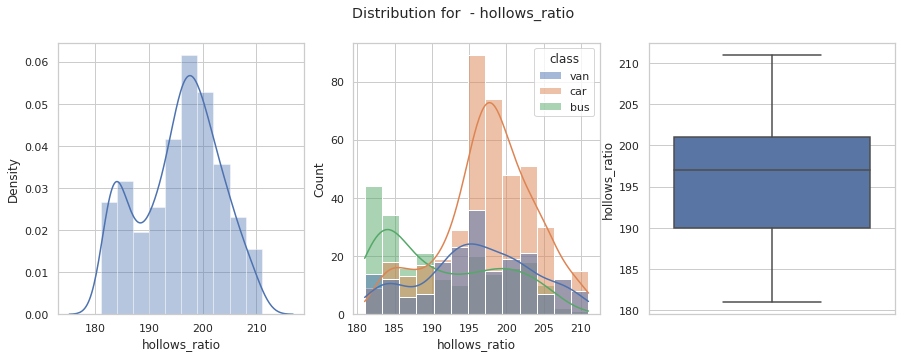

In [ ]:
columns_list = list(data_imp.columns)
columns_list.remove("class")
for columnName in columns_list:
  plot_distribution(data_imp,columnName,"class")

Observation :
 

*   Following Variables has the outliers
      - radius_radio
      - pr_axis_aspect_ratio
      - max_length_aspect_ratio
      - scaled_variance
      - scaled_variance_1
      - scaled_radius_of_gyration_1
      - skewness_about
      - skewness_about_2
*   Regaring distribution
      - Arround 6 variable, has bimodel distribution - since "Saab 9000 cars" and an "Opel Manta 400 cars"  merged in single lable "Car"
      - Most of the Variable show Right-Skewed 




In [2]:
# Check how many observation are outliers

data_imp.describe().T


NameError: ignored